# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import analysis

#These parameters can be changed
dataset = 1
analysis_type = 'temporal'

trial = analysis.gridCells('datasets/'+str(dataset)+'/', analysis_type)

In [3]:
trial.phase_analysis()

/home/daniel/PycharmProjects/Grid-Cell/analysis.py:31: RuntimeWarning: Mean of empty slice
  mpm_dict[ybin][xbin] = np.nanmean(np.asarray(phases))


Linear r correlation : 0.5839577445385089
Circular r correlation (1): -0.08926112651167571
Circular r correlation (2): -0.089261126511676


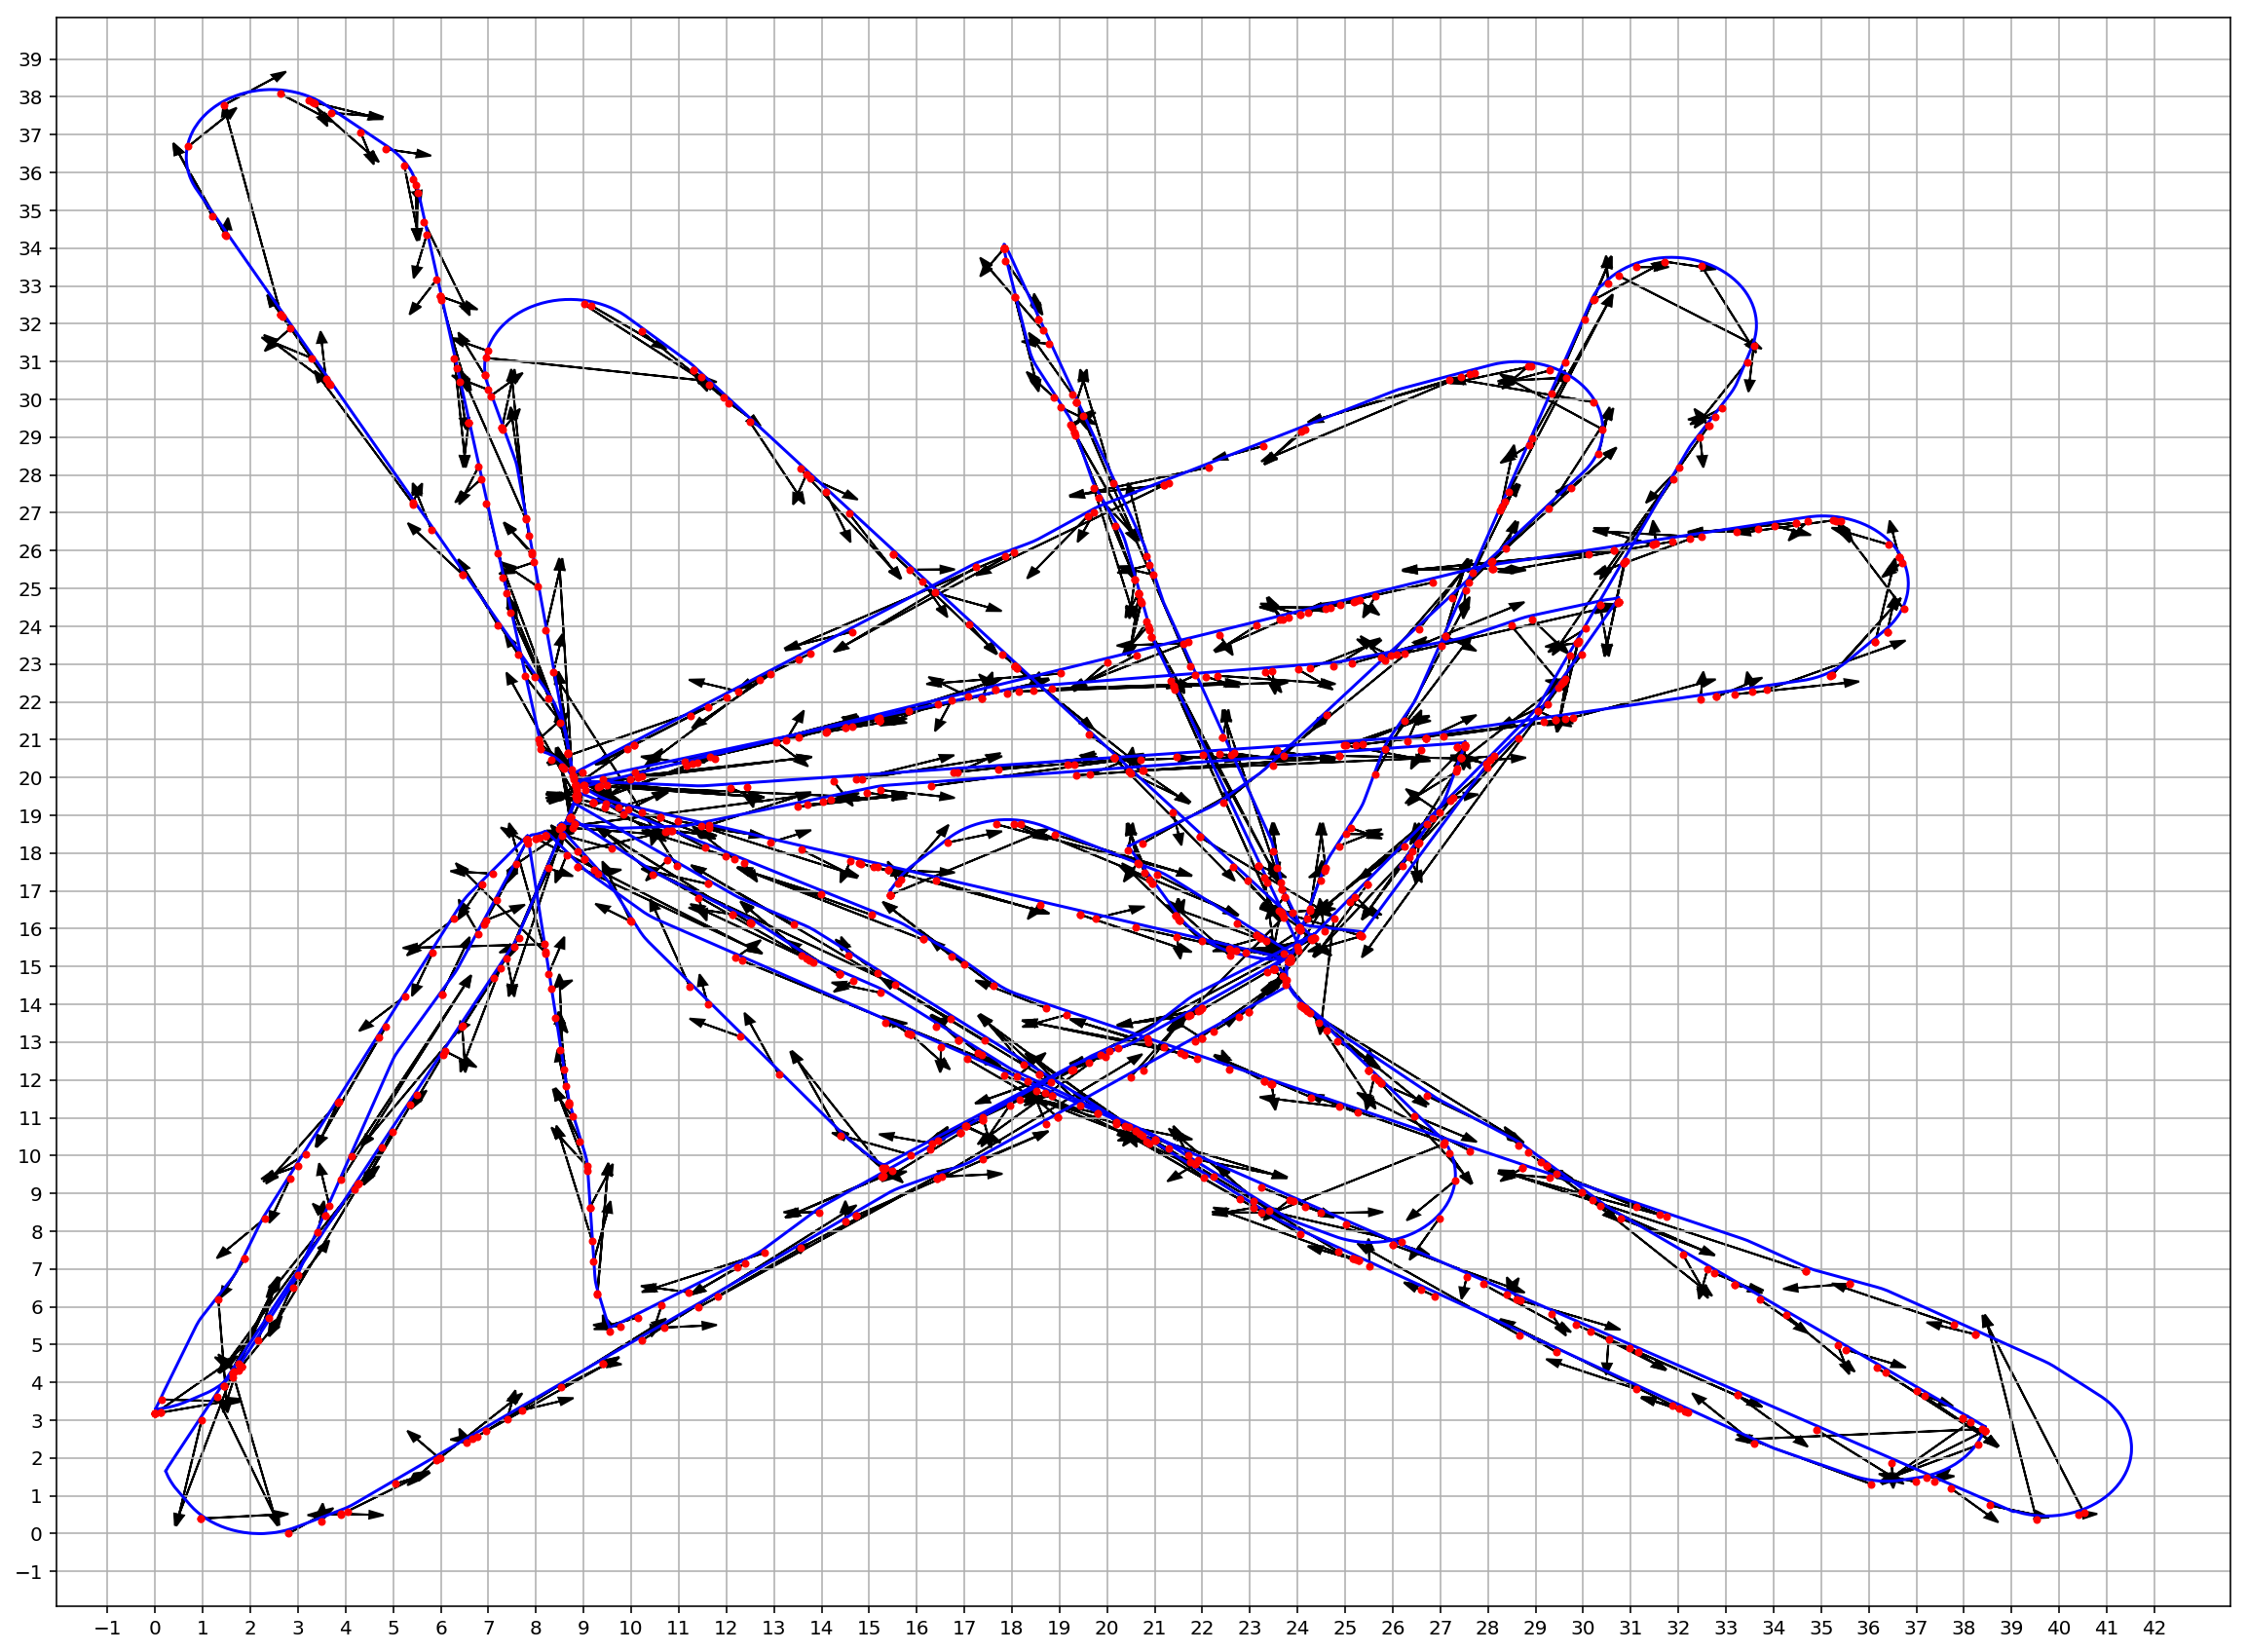

In [4]:
trial.prediction_plot()

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


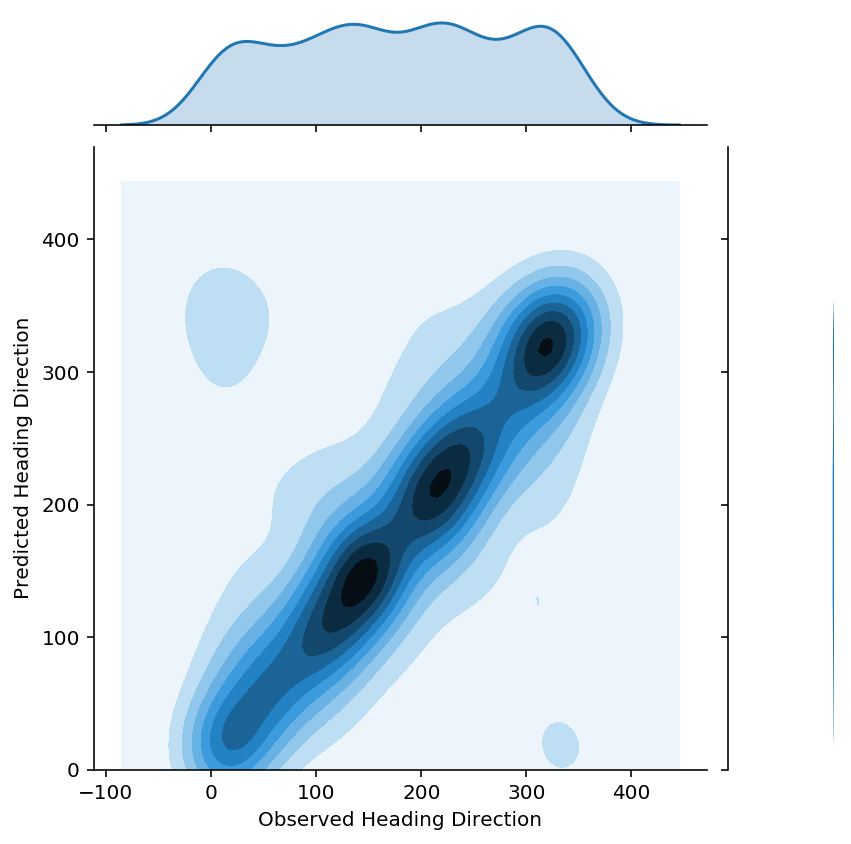

In [5]:
trial.corr_plot()

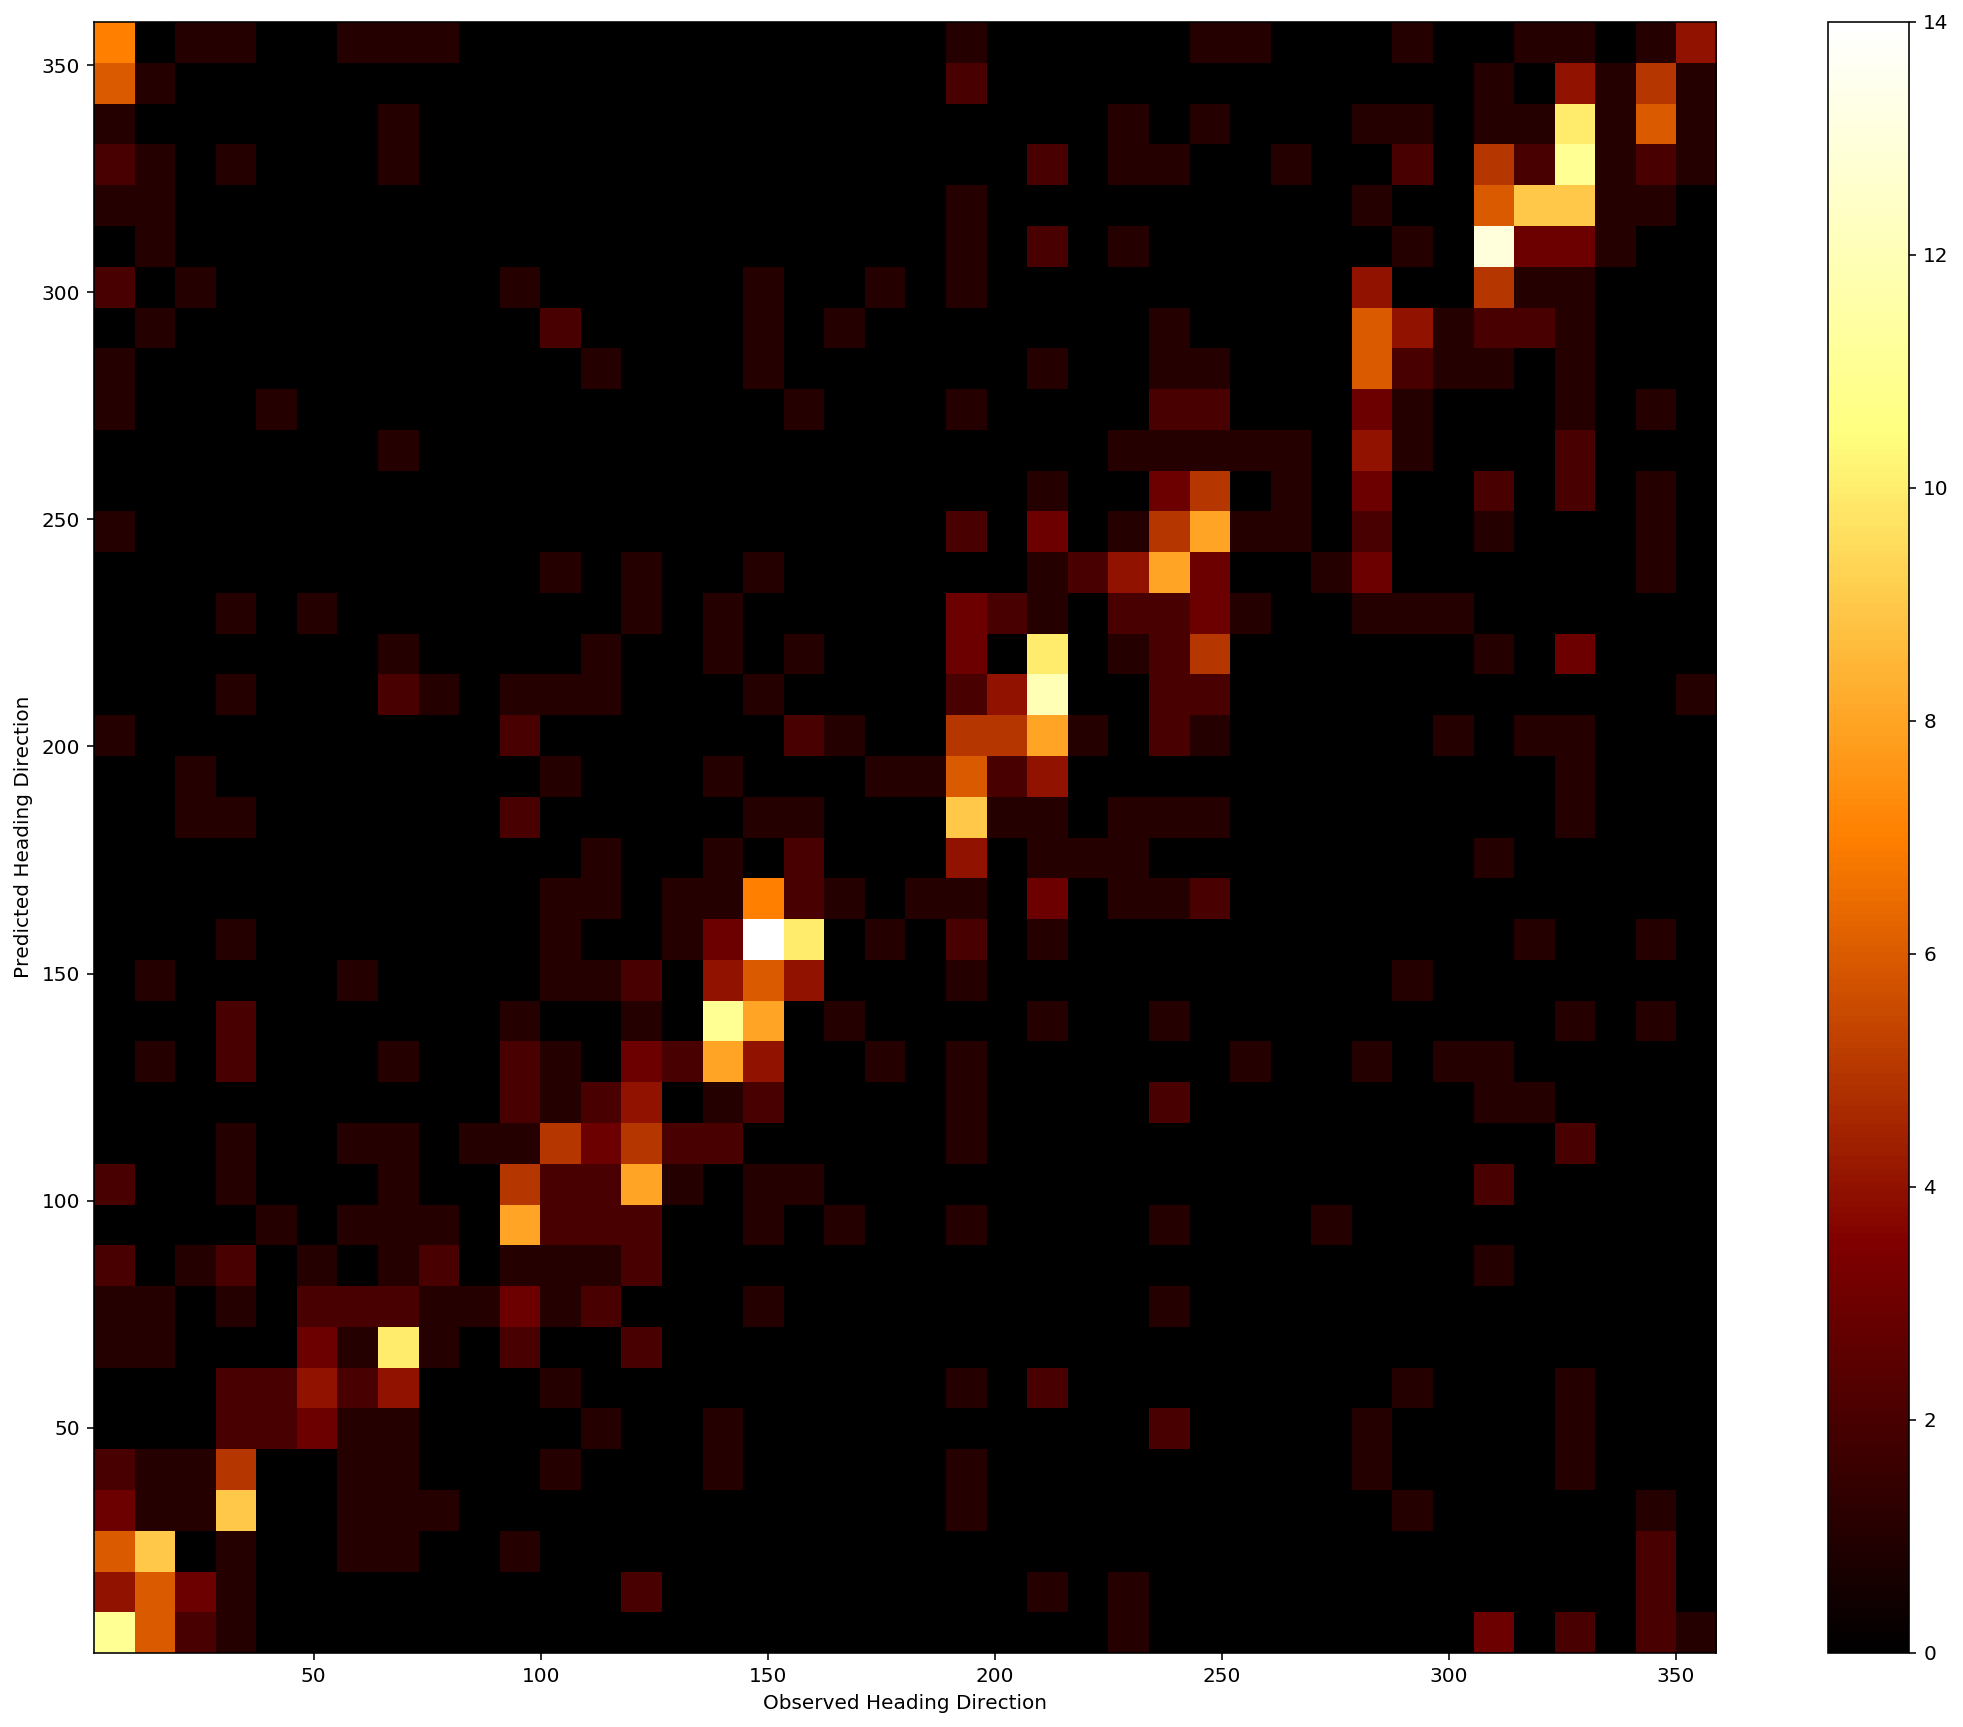

In [6]:
trial.corr_heatmap()

In [7]:
#Any other plots can be ran - trial.XY_plot(), trial.phase_plot(), trial.phase_map_plot(), trial.trajectory_plot()

